In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("/content/ecommerce_furniture_dataset_2024.csv")

In [3]:
df.shape

(2000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [5]:
df.isnull().sum()

,0
productTitle,0
originalPrice,1513
price,0
sold,0
tagText,3


In [6]:
df.drop(['originalPrice'],axis=1,inplace=True)

In [7]:
df['tagText'].fillna('others',inplace=True)

/tmp/ipython-input-2486323884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tagText'].fillna('others',inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   productTitle  2000 non-null   object
 1   price         2000 non-null   object
 2   sold          2000 non-null   int64 
 3   tagText       2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [11]:
df['price']=df['price'].replace('[\$,]','',regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1106923980.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price']=df['price'].replace('[\$,]','',regex=True).astype(float)


In [12]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping


In [13]:
df['tagText']=df['tagText'].apply(lambda x:x if x in ['Free shipping','+Shipping: $5.09']else 'others')

In [14]:
df['tagText'].value_counts()

,count
tagText,
Free shipping,1880
others,111
+Shipping: $5.09,9


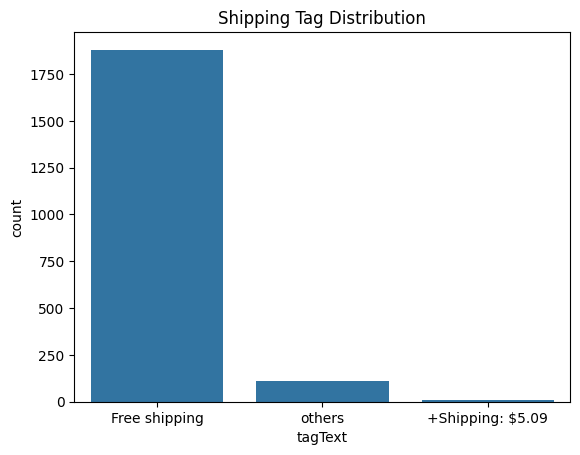

In [15]:
sns.countplot(data=df,x='tagText')
plt.title("Shipping Tag Distribution")
plt.show()

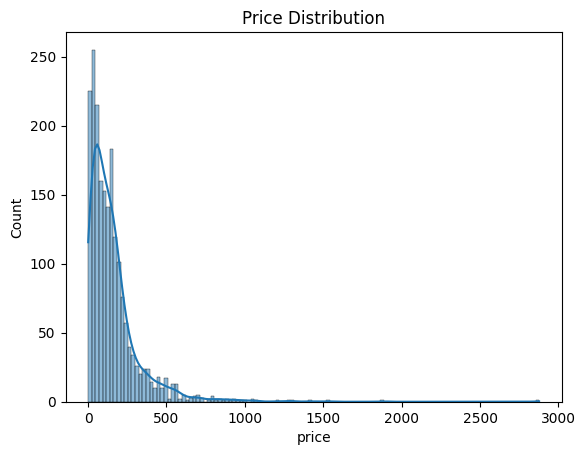

In [17]:
sns.histplot(df['price'],kde=True)
plt.title("Price Distribution")
plt.show()

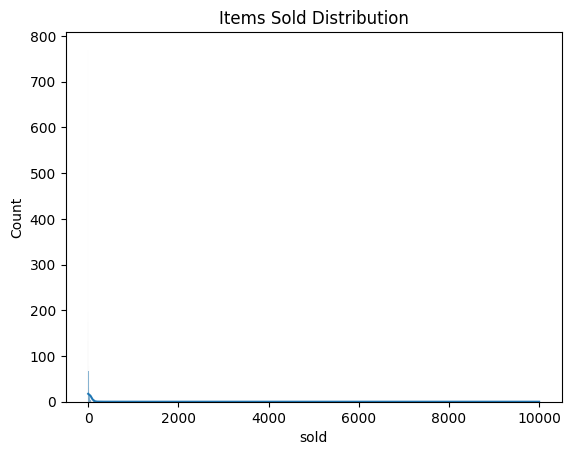

In [18]:
sns.histplot(df['sold'],kde=True)
plt.title("Items Sold Distribution")
plt.show()

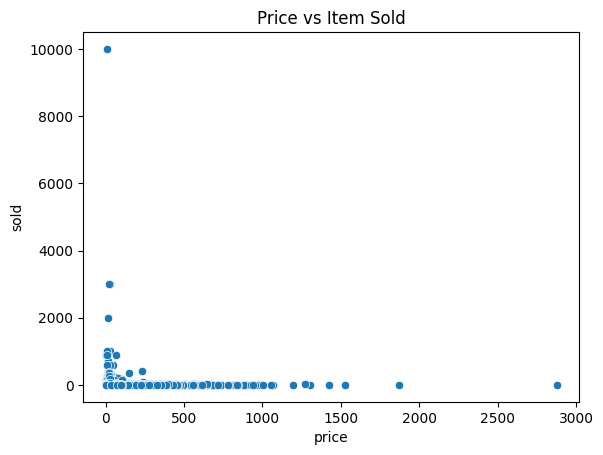

In [19]:
sns.scatterplot(data=df,x='price',y='sold')
plt.title("Price vs Item Sold")
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['tagText']=le.fit_transform(df['tagText'])

In [22]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,1
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,1
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,1
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,1
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,1


In [23]:
df.tail()

,productTitle,price,sold,tagText
1995,Modern TV Stand Entertainment Center with Two ...,72.49,8,1
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",276.65,2,1
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",196.44,10,1
1998,Furniture Acrylic Coffee Table Transparent Liv...,228.18,0,1
1999,Bed Frane Bamboo and Metal Platform Bed Frame ...,99.48,0,1


In [24]:
X= df[['price','tagText']]
y=df['sold']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [30]:
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
y_pred_lr=lr.predict(X_test)
print("Linear Regression MSE:",mean_squared_error(y_test,y_pred_lr))
print("Linear Regression R2:",r2_score(y_test,y_pred_lr))

Linear Regression MSE: 5404.498199747155
Linear Regression R2: 0.014410595753039157


In [33]:
y_pred_rf=rf.predict(X_test)
print("Random Forest MSE:",mean_squared_error(y_test,y_pred_rf))
print("Random Forest R2:",r2_score(y_test,y_pred_rf))

Random Forest MSE: 11667.927365247491
Random Forest R2: -1.127817450517255
